In [69]:
class Gruppe:
    def __init__(self, count, time):
        self.count = count
        self.time = time

def inside(gr): return gr.count**2 * gr.time
def grad_inside(gr): return 2 * gr.count * gr.time

def between(gr1, gr2): return 2 * gr1.count * gr2.count
def grad_between(gr1, gr2): return 2 * gr2.count

def grad_gr(gr1, gr2): return grad_inside(gr1)+grad_between(gr1, gr2)

def total(a, p, t):
    return inside(a)+between(a, p)+inside(p)+between(p, t)+inside(t)+between(t, a)
def grad_total(a, p, t): return grad_gr(a, p) + grad_gr(p, t) + grad_gr(t, a)

In [118]:
def grad_descent(total, grad_gr, lr, num_iter=100, a0=None, p0=None, t0=None):
    if a0 is None: a0 = Gruppe(np.random.randint(0, 61), 3)
    if p0 is None: p0 = Gruppe(np.random.randint(0, 60-a0.count+1), 4)
    if t0 is None: t0 = Gruppe(60 - a0.count - p0.count, 7)
    history = []
    curr_a = a0
    curr_p = p0
    curr_t = t0
    curr_gr = np.array([curr_a.count, curr_p.count])
    for _ in range(num_iter):
        entry = np.hstack((curr_gr, total(curr_a, curr_p, curr_t)))
        history.append(entry)
#         curr_a.count -= lr * grad_gr(curr_a, curr_p)
#         curr_p.count -= lr * grad_gr(curr_p, curr_t)
#         curr_t.count -= lr * grad_gr(curr_t, curr_a)
        tmp_a_count = int(curr_a.count - lr * grad_gr(curr_a, curr_p))
        tmp_p_count = int(curr_p.count - lr * grad_gr(curr_p, curr_t))
#         tmp_t_count = curr_t.count - lr * grad_gr(curr_t, curr_a)
        tmp_t_count = 60 - curr_a.count - curr_p.count
        curr_a.count = tmp_a_count
        curr_p.count = tmp_p_count
        curr_t.count = tmp_t_count
        curr_gr = np.array([curr_a.count, curr_p.count])
    return np.vstack(history)

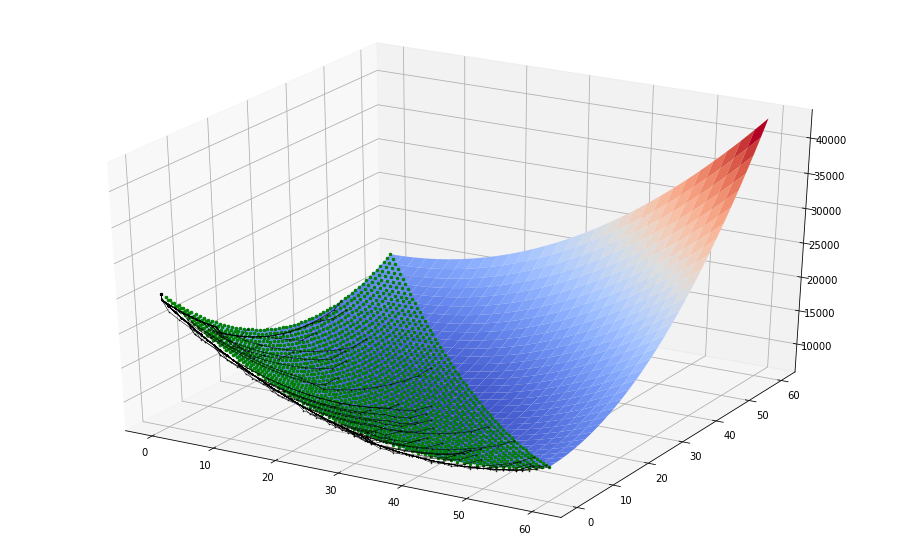

In [132]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

stepss = []
lr = 0.005
num_iter = 100
for _ in range(50):
    stepss.append(grad_descent(total, grad_gr, lr=lr, num_iter=num_iter))

x, y = np.meshgrid(np.linspace(0, 60, 61), np.linspace(0, 60, 61))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(x, y, total(Gruppe(x, 3), Gruppe(y, 4), Gruppe(60-x-y, 7)), 
                cmap=cm.coolwarm, zorder=2)
X = []
Y = []
Z = []
for i in range(61):
    for j in range(61):
        if i + j <= 60:
            X.append(i)
            Y.append(j)
            Z.append(total(Gruppe(i, 3), Gruppe(j, 4), Gruppe(60-i-j, 7)))            
ax.plot(xs=X, ys=Y, zs=Z, marker='.', markersize=5, zorder=3, lw=0, c='green')
for steps in stepss:
    ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2], marker='.', 
            markersize=1, zorder=3, markerfacecolor='y', lw=0.5, c='black')
# ax.view_init(elev=0, azim=-90)
# ax.view_init(elev=0, azim=0)
# ax.view_init(elev=90, azim=0)
# ax.view_init(elev=0, azim=90)
# ax.view_init(elev=0, azim=180)
# ax.view_init(elev=0, azim=-180)

In [114]:
mint = 9999999999999

for i in range(61):
    for j in range(61):
        if i + j <= 60:
            mint = min(mint, total(Gruppe(i, 3), Gruppe(j, 4), Gruppe(60-i-j, 7)))

In [115]:
mint

7200